In [13]:
data = Import["C:/Users/crist/OneDrive/Documentos/Redes/Redes/DataScience-Salaries/tables/salaries_2020-2025(clean).csv", "CSV"];
groupedData = Import["C:/Users/crist/OneDrive/Documentos/Redes/Redes/DataScience-Salaries/tables/salaries_2020-2025(grouped_log).csv", "CSV"];

In [15]:
data = Rest[data];
groupedData = Rest[groupedData];

In [17]:
graph1 = Graph[UndirectedEdge @@@ data];
graph2 = Graph[UndirectedEdge @@@ groupedData];

-Graphics-
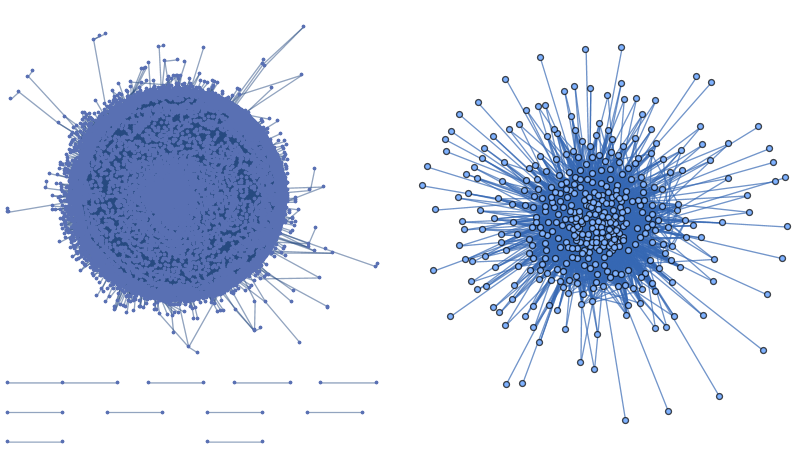

In [7]:
GraphicsGrid[Partition[Table[{GraphPlot[graph1], GraphPlot[graph2]}], 2]]

In [33]:
Export["BipartiteGraph.svg",GraphPlot[graph2,GraphLayout -> "BipartiteEmbedding"]]

BipartiteGraph.svg

In [34]:
partitionedSets = partition[graph2];
RandomSample[partitionedSets[[1]], 5]
RandomSample[partitionedSets[[2]], 5]
Length[partitionedSets[[1]]]
Length[partitionedSets[[2]]]

{Backend Developer, Data Governance Lead, Applied Scientist, Postdoctoral Fellow, 
 
>   DevOps Engineer}
{38661.74 to 40536.0, 35169.19 to 36874.14, 21906.21 to 22968.19, 
 
>   357748.93 to 375092.04, 16489.61 to 17289.0}
317
84

In [19]:
partition[graph_] := 
    Module[{list, listA, listB, subList, added},
    list = VertexList[graph];
        listA = {list[[1]]};
        listB = AdjacencyList[graph, list[[1]]];

        (* Itera sobre los vértices restantes del grafo *)
        For[i = 2, i <= Length[list], i++, 
            If[!MemberQ[Join[listA, listB], list[[i]]],
                subList = AdjacencyList[graph, list[[i]]];
                added = False;
                (* Itera sobre los vecinos del vértice actual *)
                For[j = 1, j <= Length[subList] && !added, j++,
                    (* Si uno de los vecinos está en la lista A,
                    añade el vértice a la lista B *)
                    If[MemberQ[listA, subList[[j]]], 
                        AppendTo[listB, list[[i]]]; 
                        added = True
                    ];
                    (* Si uno de los vecinos está en la lista B,
                    añade el vértice a la lista A *)
                    If[MemberQ[listB, subList[[j]]], 
                        AppendTo[listA, list[[i]]]; 
                        added = True
                    ]
                ];
                (* Si no se ha añadido el vértice a ninguna lista,
                lo añade a la lista A por defecto *)
                If[!added,
                    AppendTo[listA, list[[i]]]
                ]
            ]
        ];   
        {listA, listB}
    ]

In [9]:
projection[graph_, setUorV_] :=
    Module[{set, projectedGraph, discNodes, list1, added,list2},
        set = Switch[setUorV,
            U, partition[graph][[1]],
            V, partition[graph][[2]]
        ];
        projectedGraph = Graph[{}];
        (* Itera sobre cada vértice en el conjunto seleccionado (set). *)
        For[i = 1, i <= Length[set], i++,
        list1 = AdjacencyList[graph, set[[i]]];
            (* Para cada vértice j en el conjunto set, verifica si existe una intersección 
            entre los vecinos de los vértices i y j. *)
            added = False;
            For[j = 1, i != j && j <= Length[set] && !EdgeQ[projectedGraph, set[[i]] <-> set[[j]]], j++,
                list2 = AdjacencyList[graph, set[[j]]];
                (* Si los conjuntos de adyacencia de i y j tienen elementos en común (hay una intersección) 
                y aún no se ha agregado la conexión (arista) entre ellos, se añade al grafo proyectado. *)
                If[Intersection[list1, list2] != {},
                    projectedGraph = EdgeAdd[projectedGraph, set[[i]] <-> set[[j]]];
                    added = True
                ]
            ];
            If[!added, projectedGraph = VertexAdd[projectedGraph, set[[i]]]]
        ];
        projectedGraph
    ]

In [10]:
graph2U = projection[graph2, U]; (*GroupedJob*)